In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import tf_keras
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.resnet_v2 import preprocess_input

In [10]:
# Set the image shape for input to the classifier
image_shape = (224, 224)

# Define a Sequential model with a pre-trained MobileNet V2 classifier
classifier = tf_keras.Sequential([
    hub.KerasLayer(
        "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-classification/4",  # URL for the pre-trained MobileNet V2 model
        input_shape=image_shape + (3,)  # Specify the input shape (224x224x3 for RGB images)
    )
])

In [11]:
data_dir="C:\\Users\\mvenu\\OneDrive\\Desktop\\tomato_leaf"

In [12]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/mvenu/OneDrive/Desktop/tomato_leaf')

In [13]:
os.listdir(data_dir)

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [14]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/Users/mvenu/OneDrive/Desktop/tomato_leaf/Tomato___Bacterial_spot/bacterial_spot (1).JPG'),
 WindowsPath('C:/Users/mvenu/OneDrive/Desktop/tomato_leaf/Tomato___Bacterial_spot/bacterial_spot (10).JPG'),
 WindowsPath('C:/Users/mvenu/OneDrive/Desktop/tomato_leaf/Tomato___Bacterial_spot/bacterial_spot (100).JPG'),
 WindowsPath('C:/Users/mvenu/OneDrive/Desktop/tomato_leaf/Tomato___Bacterial_spot/bacterial_spot (1000).JPG'),
 WindowsPath('C:/Users/mvenu/OneDrive/Desktop/tomato_leaf/Tomato___Bacterial_spot/bacterial_spot (101).JPG')]

In [16]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

5999


In [17]:
Bacterial_spot = list(data_dir.glob('Tomato___Bacterial_spot/*'))
Bacterial_spot[:5]

[WindowsPath('C:/Users/mvenu/OneDrive/Desktop/tomato_leaf/Tomato___Bacterial_spot/bacterial_spot (1).JPG'),
 WindowsPath('C:/Users/mvenu/OneDrive/Desktop/tomato_leaf/Tomato___Bacterial_spot/bacterial_spot (10).JPG'),
 WindowsPath('C:/Users/mvenu/OneDrive/Desktop/tomato_leaf/Tomato___Bacterial_spot/bacterial_spot (100).JPG'),
 WindowsPath('C:/Users/mvenu/OneDrive/Desktop/tomato_leaf/Tomato___Bacterial_spot/bacterial_spot (1000).JPG'),
 WindowsPath('C:/Users/mvenu/OneDrive/Desktop/tomato_leaf/Tomato___Bacterial_spot/bacterial_spot (101).JPG')]

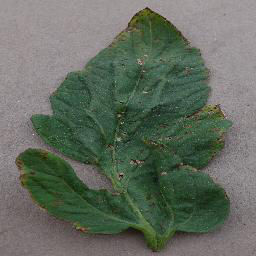

In [19]:
PIL.Image.open(str(Bacterial_spot[0]))

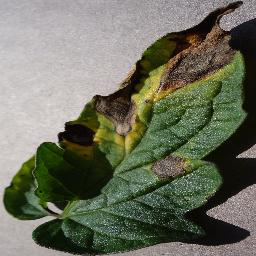

In [20]:
Early_blight = list(data_dir.glob('Tomato___Early_blight/*'))
PIL.Image.open(str(Early_blight[5]))

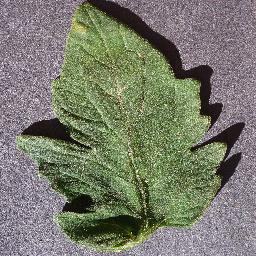

In [21]:
healthy = list(data_dir.glob('Tomato___healthy/*'))
PIL.Image.open(str(healthy[5]))

In [23]:
tomato_disease_images_dict = {
    'Bacterial_spot': list(data_dir.glob('Tomato___Bacterial_spot/*')),
    'Early_blight':list(data_dir.glob('Tomato___Early_blight/*')),
    'healthy':list(data_dir.glob('Tomato___healthy/*')),
    'Late_blight':list(data_dir.glob('Tomato___Late_blight/*')),
    'Leaf_Mold':list(data_dir.glob('Tomato___Leaf_Mold/*')),
    'yellow_leaf_curl_virus':list(data_dir.glob('Tomato___Tomato_Yellow_Leaf_Curl_Virus/*')) 
}

In [24]:
tomato_disease_labels_dict = {
    'Bacterial_spot':0,
    'Early_blight':1,
    'healthy':2,
    'Late_blight':3,
    'Leaf_Mold':4,
    'yellow_leaf_curl_virus':5
}

In [25]:
tomato_disease_images_dict['Bacterial_spot'][:5]

[WindowsPath('C:/Users/mvenu/OneDrive/Desktop/tomato_leaf/Tomato___Bacterial_spot/bacterial_spot (1).JPG'),
 WindowsPath('C:/Users/mvenu/OneDrive/Desktop/tomato_leaf/Tomato___Bacterial_spot/bacterial_spot (10).JPG'),
 WindowsPath('C:/Users/mvenu/OneDrive/Desktop/tomato_leaf/Tomato___Bacterial_spot/bacterial_spot (100).JPG'),
 WindowsPath('C:/Users/mvenu/OneDrive/Desktop/tomato_leaf/Tomato___Bacterial_spot/bacterial_spot (1000).JPG'),
 WindowsPath('C:/Users/mvenu/OneDrive/Desktop/tomato_leaf/Tomato___Bacterial_spot/bacterial_spot (101).JPG')]

In [26]:
str(tomato_disease_images_dict['Bacterial_spot'][0])

'C:\\Users\\mvenu\\OneDrive\\Desktop\\tomato_leaf\\Tomato___Bacterial_spot\\bacterial_spot (1).JPG'

In [27]:
img = cv2.imread(str(tomato_disease_images_dict['Bacterial_spot'][0]))

In [28]:
X, y = [], []

for tomato_diease_name, images in tomato_disease_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(128,128))
        X.append(resized_img)
        y.append(tomato_disease_labels_dict[tomato_diease_name])

In [29]:
X = np.array(X)
y = np.array(y)

In [30]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
#Make prediction using pre-trained model on new flowers dataset

X[0].shape

(128, 128, 3)

In [32]:
from tensorflow.image import resize

X_train_resized = np.array([resize(img, (128, 128)) for img in X_train])
X_test_resized = np.array([resize(img, (128, 128)) for img in X_test])

X_train_scaled = X_train_resized / 255
X_test_scaled = X_test_resized / 255

In [33]:
# Load the pre-trained MobileNetV2 model without the top classification layer
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(128, 128, 3))  

# Freeze the base model to prevent its weights from being updated during training
base_model.trainable = False  

In [34]:
# Set the number of classes for the classification task
num_of_sports_celebrity = 6  # Number of unique sports celebrities (6 classes)

# Define the model architecture using the pre-trained base model
mobilenet_model = Sequential([
    base_model,  # Add the frozen MobileNetV2 base model
    GlobalAveragePooling2D(),  # Add global average pooling to reduce dimensions
    Dense(num_of_sports_celebrity)  # Output layer with logits (no activation applied yet)
])

# Display a summary of the model architecture
mobilenet_model.summary()  # Provides details about each layer, parameters, and total trainable parameters

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │           7,686 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,265,670 (8.64 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [35]:
# Compile the MobileNetV2 model with the Adam optimizer and Sparse Categorical Crossentropy loss function
mobilenet_model.compile(
    optimizer="adam",  # Optimizer for model training
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Loss function for multi-class classification
    metrics=['accuracy']  # Metrics to track during training (accuracy)
)

# Preprocess the training and test data using MobileNetV2's preprocessing function
X_train_scaled = preprocess_input(X_train)  # Preprocess the training images
X_test_scaled = preprocess_input(X_test)  # Preprocess the test images

# Train the model with the preprocessed data for 10 epochs
mobilenet_model.fit(X_train_scaled, y_train, epochs=10)  # Train the model with training data


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 35s 171ms/step - accuracy: 0.5995 - loss: 1.1138
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 167ms/step - accuracy: 0.9002 - loss: 0.3319
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 23s 163ms/step - accuracy: 0.9301 - loss: 0.2309
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 168ms/step - accuracy: 0.9509 - loss: 0.1814
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 168ms/step - accuracy: 0.9621 - loss: 0.1508
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 171ms/step - accuracy: 0.9692 - loss: 0.1336
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 169ms/step - accuracy: 0.9724 - loss: 0.1109
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 168ms/step - accuracy: 0.9805 - loss: 0.0946
Epoch 9/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 169ms/step - accuracy: 0.9814 - loss: 0.0899
Epoch 10/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 167ms/step - accuracy: 0.9834 - loss: 0.0805


In [36]:
# Evaluate the trained MobileNetV2 model on the test data to check its performance
mobilenet_model.evaluate(X_test_scaled, y_test)  # Returns loss and accuracy on the test set

47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.9254 - loss: 0.2025


[0.21166327595710754, 0.9266666769981384]

In [37]:
y_pred = mobilenet_model.predict(X_test_scaled)  # Predict class probabilities for the test data
y_pred = [np.argmax(i) for i in y_pred]  # Convert probabilities to class labels by selecting the highest probability

47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 211ms/step


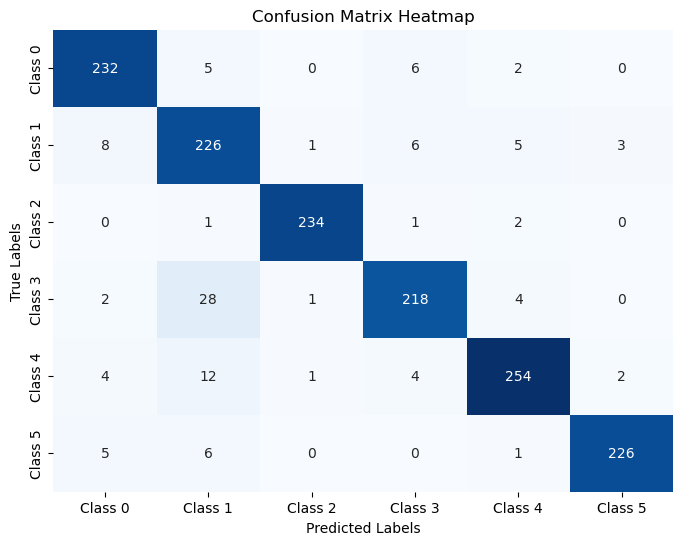

In [38]:
import seaborn as sns  # Import seaborn for visualizing data
from sklearn.metrics import confusion_matrix, classification_report  # Import evaluation metrics
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(len(cm))],
            yticklabels=[f'Class {i}' for i in range(len(cm))], cbar=False)  # Create the heatmap
plt.title('Confusion Matrix Heatmap')  # Add title to the heatmap
plt.xlabel('Predicted Labels')  # X-axis label
plt.ylabel('True Labels')  # Y-axis label
plt.show()  # Display the heatmap

In [39]:
print(classification_report(y_test, y_pred))  # Print precision, recall, F1-score, and support for each class

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       245
           1       0.81      0.91      0.86       249
           2       0.99      0.98      0.99       238
           3       0.93      0.86      0.89       253
           4       0.95      0.92      0.93       277
           5       0.98      0.95      0.96       238

    accuracy                           0.93      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.93      0.93      0.93      1500



In [40]:
mobilenet_model.save("tomato3.h5")